<a href="https://colab.research.google.com/github/chiruconew/EXTRA/blob/main/MODELO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. CARGA DEL DATA SET Y CARGA DE LIBRERIAS INICIALES

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [122]:
url = 'https://raw.githubusercontent.com/chiruconew/EXTRA/main/data_set_dg.csv'
df  = pd.read_csv(url)

In [123]:
df.head()

,TELEFONO,CUOTA_BASICA,TIPO_PRODUCTO,CAPACIDAD_PLAN_DATOS,NIT,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,DEPARTAMENTO_GUATEMALA,INICIO_DE_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,PROMEDIO_CONSUMO_DATOS_GB,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,FACTURAS_PAGADAS_TARDE,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,AVG_DIAS_PAGO_TARDE,DOWNSELL
0,52017983,198.9904,C,5,153912-4,0.0,1.0,246.0,18.0,GUATEMALA,06-OCT-16 00:00:00,NaN,NaN,1.0,0.18,0.0,10.0,1.0,0.0,-4.0,NO
1,55287011,499.0048,C,20,4930230-2,3.0,2.0,200.0,24.0,ESCUINTLA,07-JAN-19 00:00:00,3042.17,1607.14,10.0,0.51,8.0,2.0,1.0,2.0,-1.0,NO
2,53187495,298.9952,C,15,1199130-5,0.0,3.0,98.0,24.0,GUATEMALA,03-JAN-20 00:00:00,1237.57,207.36,5.0,0.33,10.0,0.0,1.0,8.0,0.0,NO
3,57813259,224.9968,Q,14,87103923,0.0,1.0,39.0,0.0,SOLOLA,21-AUG-20 00:00:00,NaN,NaN,18.0,1.29,4.0,4.0,1.0,17.0,-18.0,NO
4,40152016,298.9952,C,15,1526520-K,0.0,1.0,16.0,24.0,SAN MARCOS,15-NOV-19 00:00:00,1441.82,0.90,8.0,0.50,6.0,4.0,2.0,18.0,-5.0,NO


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18032 entries, 0 to 18031
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TELEFONO                        18032 non-null  int64  
 1   CUOTA_BASICA                    18032 non-null  float64
 2   TIPO_PRODUCTO                   18032 non-null  object 
 3   CAPACIDAD_PLAN_DATOS            18032 non-null  int64  
 4   NIT                             18032 non-null  object 
 5   ANEXOS_HOME                     13008 non-null  float64
 6   ANEXOS_MOBILE                   13008 non-null  float64
 7   MESES_CLIENTE_ANTIGUEDAD        17468 non-null  float64
 8   MESES_CONTRATO                  17468 non-null  float64
 9   DEPARTAMENTO_GUATEMALA          17468 non-null  object 
 10  INICIO_DE_CONTRATO              17468 non-null  object 
 11  SUBSIDIO                        13852 non-null  float64
 12  PAGO_DEVICE_CLIENTE             

**BORRAMOS LOS NA**

In [125]:
df_recortado = df.dropna()

**Deteccion y Eliminacion de Outliers**

In [126]:
df_recortado.describe()

,TELEFONO,CUOTA_BASICA,CAPACIDAD_PLAN_DATOS,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,PROMEDIO_CONSUMO_DATOS_GB,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,FACTURAS_PAGADAS_TARDE,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,AVG_DIAS_PAGO_TARDE
count,1.015700e+04,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000
mean,4.548819e+07,472.932098,23.733090,0.883332,3.134489,116.457025,22.339470,2574.829244,983.451752,14.381018,0.676460,6.370385,3.453087,1.181451,9.918972,-3.286699
std,9.781400e+06,213.122423,14.728745,5.787397,49.861048,103.561452,2.751016,1990.478584,1680.415196,10.357149,0.424278,3.900478,3.689090,0.404848,8.314043,6.151343
min,3.000016e+07,98.996800,1.000000,0.000000,1.000000,2.000000,0.000000,-8879.250000,-8212.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-166.000000
25%,3.712187e+07,298.995200,15.000000,0.000000,1.000000,48.000000,18.000000,1385.730000,0.890000,7.000000,0.360000,3.000000,0.000000,1.000000,3.000000,-4.000000
50%,4.843955e+07,399.000000,20.000000,0.000000,1.000000,100.000000,24.000000,1890.520000,133.040000,12.000000,0.660000,7.000000,2.000000,1.000000,8.000000,-2.000000
75%,5.308374e+07,598.998400,30.000000,0.000000,2.000000,161.000000,24.000000,3617.410000,1383.040000,19.000000,0.930000,9.000000,7.000000,1.000000,16.000000,0.000000
max,5.999998e+07,1498.000000,70.000000,386.000000,3234.000000,1475.000000,24.000000,13266.570000,9496.860000,104.000000,6.960000,54.000000,56.000000,9.000000,169.000000,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2bccd2e90>,
      dtype=object)

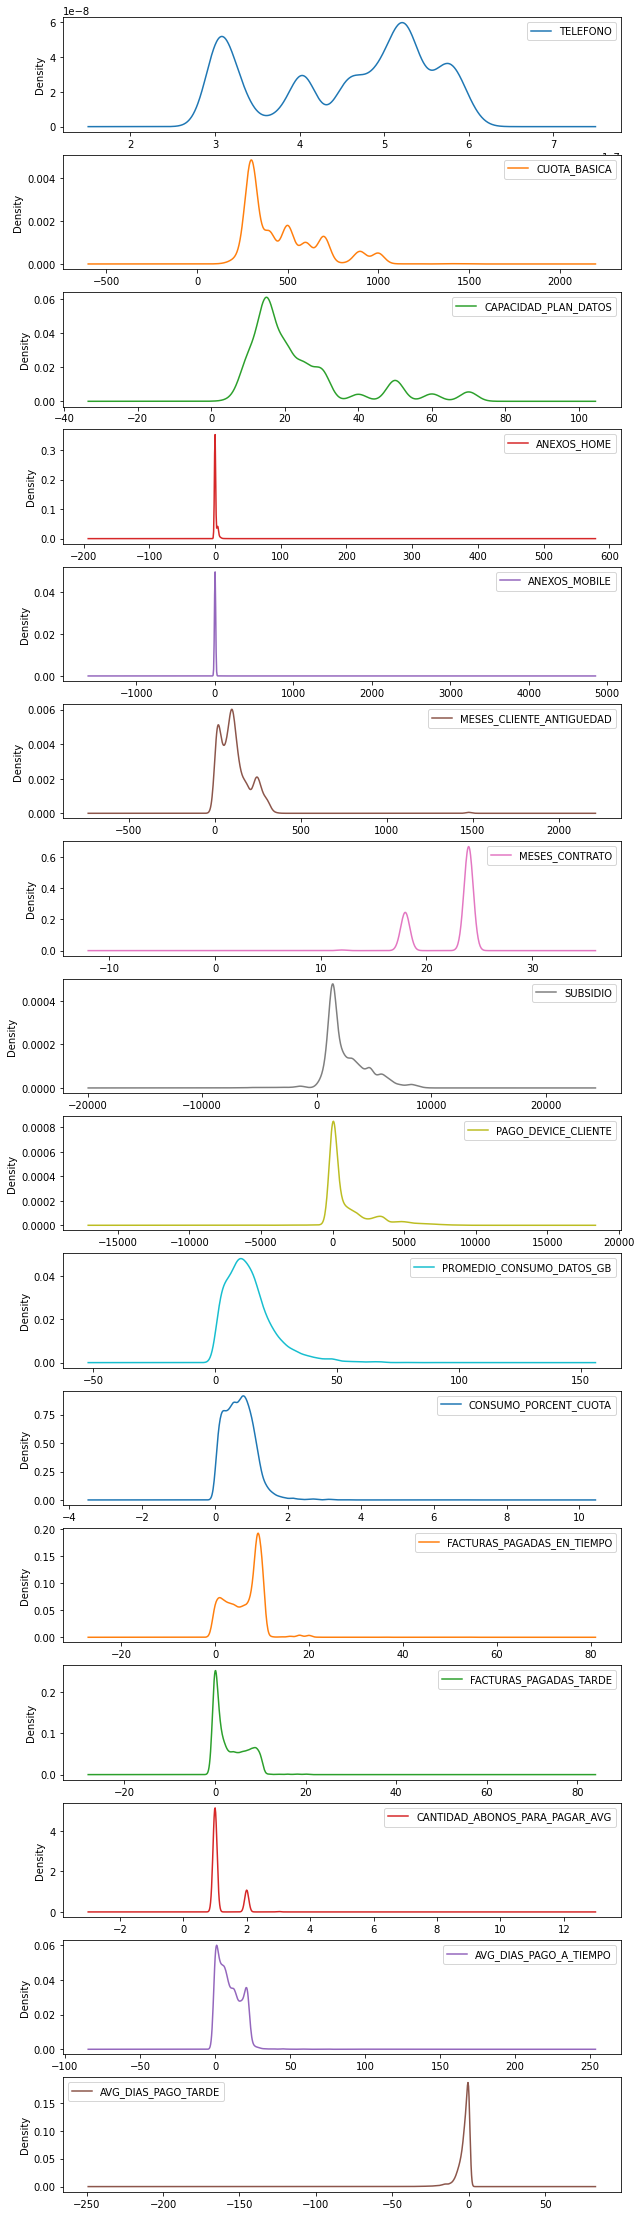

In [127]:
df_recortado.plot.kde(subplots=True, figsize=(10,40), sharex=False)

In [128]:
df_recortado = df_recortado[df_recortado['CAPACIDAD_PLAN_DATOS'] > 0]
df_recortado = df_recortado[df_recortado['CUOTA_BASICA'] > 0]
df_recortado = df_recortado[df_recortado['ANEXOS_HOME'] < 20]
df_recortado = df_recortado[df_recortado['ANEXOS_MOBILE'] < 20]
df_recortado = df_recortado[df_recortado['MESES_CLIENTE_ANTIGUEDAD'] < 400]
df_recortado = df_recortado[df_recortado['MESES_CONTRATO'] > 0]

**CONVERTTIMOS LA CLASE EN NUMERICA**

In [129]:
df_recortado['DOWNSELL'].replace({"NO": 0, "SI": 1}, inplace=True)

**ELIMINAMOS LAS COLUMNAS TELEFONO, NIT, e INICIO_DE_CONTRATO**

In [130]:
df_recortado = df_recortado.drop(['TELEFONO','NIT','INICIO_DE_CONTRATO'], axis=1)

Revisamos como quedo el Data Set Inicial ya Limpio



In [131]:
df_recortado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 1 to 17466
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CUOTA_BASICA                    10105 non-null  float64
 1   TIPO_PRODUCTO                   10105 non-null  object 
 2   CAPACIDAD_PLAN_DATOS            10105 non-null  int64  
 3   ANEXOS_HOME                     10105 non-null  float64
 4   ANEXOS_MOBILE                   10105 non-null  float64
 5   MESES_CLIENTE_ANTIGUEDAD        10105 non-null  float64
 6   MESES_CONTRATO                  10105 non-null  float64
 7   DEPARTAMENTO_GUATEMALA          10105 non-null  object 
 8   SUBSIDIO                        10105 non-null  float64
 9   PAGO_DEVICE_CLIENTE             10105 non-null  float64
 10  PROMEDIO_CONSUMO_DATOS_GB       10105 non-null  float64
 11  CONSUMO_PORCENT_CUOTA           10105 non-null  float64
 12  FACTURAS_PAGADAS_EN_TIEMPO      

## PREPROCESING

**Utilizaremos ONE HOT ENCODER para la variable TIPO DE PRODUCTO**

In [132]:
!pip install category_encoders

In [133]:
from category_encoders import OneHotEncoder

onehot_enc = OneHotEncoder( use_cat_names=True)
df_train_tipoprod = onehot_enc.fit_transform(df_recortado['TIPO_PRODUCTO'])
df_recortado = pd.concat([df_recortado, df_train_tipoprod], axis=1)

df_recortado = df_recortado.drop(['TIPO_PRODUCTO'], axis=1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



**Utlilizamos en Frequency para el conteo de Departamentos**

In [134]:
from category_encoders import CountEncoder
count_enc_depto = CountEncoder( combine_min_nan_groups=True, min_group_size=35,min_group_name='OTROS')
df_recortado['DEPARTAMENTO_TRANS'] = count_enc_depto.fit_transform(df_recortado['DEPARTAMENTO_GUATEMALA'])
df_recortado = df_recortado.drop(['DEPARTAMENTO_GUATEMALA'], axis=1)

**VAMOS A SEPARAR EN TRAIN Y TEST**

Necesitamos convertir el dataframe en ARRAY DE NUMPY para poder utilizar la funcion de Stratify y partir un dataset Desbalanceado

In [135]:
import numpy as np

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_df =  df_recortado.drop(['DOWNSELL'], axis=1)

In [138]:
y_df = df_recortado['DOWNSELL']

In [139]:
X = X_df.to_numpy()
y = y_df.to_numpy()

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)

**Usaremos una regresion Logistica, basada en el X_train y X_test, que separamos anteriormente**

In [141]:
from sklearn.linear_model import LogisticRegression
regresion_logistica = LogisticRegression( max_iter=1000)
regresion_logistica.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
score = regresion_logistica.score(X, y)
print("Accuracy: ",f"{score}")

Accuracy:  0.9445818901533894


**Vamos a probar con un Arbol de Decisiones**

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [145]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_df,y_df)
y_pred = clf.predict(X_test)

In [146]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


## TRANSFORMATION

**NOrmalizamos las variables numericas, con el proposito que converga**

Iniciamos con la Capacidad del Plan de Datos, con ONE HOT ENCONDER

In [147]:
from category_encoders import OneHotEncoder

In [148]:
X_df['CAP_PLAN_ENC'] = df_recortado['CAPACIDAD_PLAN_DATOS'].astype(str)
onehot_enc = OneHotEncoder( use_cat_names=True)
X_caplan = onehot_enc.fit_transform(X_df['CAP_PLAN_ENC'])
X_df = pd.concat([X_df, X_caplan], axis=1)
X_df = X_df.drop(['CAPACIDAD_PLAN_DATOS','CAP_PLAN_ENC'], axis=1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



Vamos a transformar la Cuota Basica

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
scaler = MinMaxScaler()
col_name = 'CUOTA_BASICA'
trans_col_name = 'CUOTA_BASICA_MM'
X_df[trans_col_name] = scaler.fit_transform(X_df[[col_name]])
X_df = X_df.drop(['CUOTA_BASICA'], axis=1)

Pasaremos las variables Anexos Home y Anexos Movil que son numericas, las convertiremos en variables Categoricas

In [151]:
X_df.loc[X_df['ANEXOS_MOBILE'] == 0, 'ANEXOS_TRANS'] = 0
X_df.loc[X_df['ANEXOS_MOBILE'] != 0, 'ANEXOS_TRANS'] = 1
X_df.loc[X_df['ANEXOS_HOME'] == 0, 'ANEXOS_TRANS_2'] = 0
X_df.loc[X_df['ANEXOS_HOME'] != 0, 'ANEXOS_TRANS_2'] = 1
X_df['ANEXOS_TRANS_V'] = X_df['ANEXOS_TRANS'] + X_df['ANEXOS_TRANS_2']

In [152]:
X_df = X_df.drop(['ANEXOS_MOBILE','ANEXOS_HOME'], axis=1)

Transformaremos los meses de antiguedad del cliente a una distribucion lo mas normal posible a traves de Power Transform Yeo-Johnson

In [153]:
from sklearn.preprocessing import PowerTransformer

In [154]:
scaler = PowerTransformer()
col_name ='MESES_CLIENTE_ANTIGUEDAD'
trans_col_name='MESES_CLIENTE_ANTIGUEDAD_PW'
X_df[trans_col_name] = scaler.fit_transform(X_df[[col_name]])
X_df = X_df.drop(['MESES_CLIENTE_ANTIGUEDAD'], axis=1)

Vamos a convertir los meses de contrato del cliente en una variable categorica a traves de CountEncoder

In [155]:
from category_encoders import CountEncoder

In [156]:
X_df.loc[X_df['MESES_CONTRATO'] == 12, 'MESES_CONT_NAME'] = 'DOCE'
X_df.loc[X_df['MESES_CONTRATO'] == 24, 'MESES_CONT_NAME'] = 'VEINTICUATRO'
X_df.loc[X_df['MESES_CONTRATO'] == 18, 'MESES_CONT_NAME'] = 'DIECIOCHO'

In [157]:
count_enc_meses = CountEncoder(normalize=True)

In [158]:
X_df['MESES_CONT_TRANS'] = count_enc_meses.fit_transform(X_df['MESES_CONT_NAME'])
X_df = X_df.drop(['MESES_CONT_NAME','MESES_CONTRATO'], axis=1)

Vamos transfomar el Subisidio a traves de QuantileTransformer

In [159]:
from sklearn.preprocessing import QuantileTransformer
subsidio_scaler = QuantileTransformer( output_distribution='normal')
col_name = 'SUBSIDIO'
trans_col_name = 'SUBSIDIO_QT'
X_df[trans_col_name] = subsidio_scaler.fit_transform(X_df[[col_name]])
X_df = X_df.drop(['SUBSIDIO'], axis=1)

Vamos transfomar la variable PAGO DEVICE CLIENTE, a traves de POWER TRANSFORM

In [160]:
X_df['PAGO_DEVICE_CLIENTE'] = X_df['PAGO_DEVICE_CLIENTE'].abs() 
pagoCliente_scaler = PowerTransformer()
col_name = 'PAGO_DEVICE_CLIENTE'
trans_col_name = 'PAGO_DEVICE_CLIENTE_PT'
X_df[trans_col_name] = pagoCliente_scaler.fit_transform(X_df[[col_name]])
X_df = X_df.drop(['PAGO_DEVICE_CLIENTE'], axis=1)

Vamos a transformar la variable AVG_DIAS_PAGO_A_TIEMPO y AVG_DIAS_PAGO_TARDE con MinMax Scale

In [605]:
scaler = MinMaxScaler()

col_name = 'AVG_DIAS_PAGO_TARDE'
trans_col_name = 'AVG_DIAS_PAGO_TARDE_MM'
X_df[trans_col_name] = scaler.fit_transform(X_df[[col_name]])
X_df = X_df.drop(['AVG_DIAS_PAGO_TARDE'], axis=1)

col_name = 'AVG_DIAS_PAGO_A_TIEMPO'
trans_col_name = 'AVG_DIAS_PAGO_A_TIEMPO_MM'
X_df[trans_col_name] = scaler.fit_transform(X_df[[col_name]])
X_df = X_df.drop(['AVG_DIAS_PAGO_A_TIEMPO'], axis=1)



Vamos a crear una nueva variable categorica a partir de las variables numericas FACTURAS_PAGADAS_EN_TIEMPO y FACTURAS_PAGADAS_TARDE, y quedara con un RATIO

In [161]:
X_df['POR_PAGO_FACTURAS'] = X_df['FACTURAS_PAGADAS_EN_TIEMPO'] / (X_df['FACTURAS_PAGADAS_TARDE'] + X_df['FACTURAS_PAGADAS_EN_TIEMPO'])
X_df = X_df.drop(['FACTURAS_PAGADAS_EN_TIEMPO','FACTURAS_PAGADAS_TARDE'], axis=1)


In [162]:
X_df = X_df.drop(['CANTIDAD_ABONOS_PARA_PAGAR_AVG','PROMEDIO_CONSUMO_DATOS_GB'], axis=1)

## ITERACIONES

**Probaremos con el modelo de Regresion LIneal Logistica con variables Transformadas**

In [608]:
X = X_df.to_numpy()
y = y_df.to_numpy()

In [609]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)

In [610]:
regresion_logistica = LogisticRegression( max_iter=20000)
regresion_logistica.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [611]:
score = regresion_logistica.score(X, y)
print("Accuracy: ",f"{score}")

Accuracy:  0.9501821403957862


Probaremos con el modelo de Arboles de Decision con variables transformadas

In [612]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_df,y_df)
y_pred = clf.predict(X_test)

In [613]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


## Vamos a definir dos datasets uno de numericas y otro de Categoricas, las cuales ya fueron transformadas

In [614]:
X_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10157 entries, 1 to 17466
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CONSUMO_PORCENT_CUOTA        10157 non-null  float64
 1   TIPO_PRODUCTO_C              10157 non-null  int64  
 2   TIPO_PRODUCTO_A              10157 non-null  int64  
 3   TIPO_PRODUCTO_Q              10157 non-null  int64  
 4   DEPARTAMENTO_TRANS           10157 non-null  int64  
 5   CAP_PLAN_ENC_20              10157 non-null  int64  
 6   CAP_PLAN_ENC_15              10157 non-null  int64  
 7   CAP_PLAN_ENC_25              10157 non-null  int64  
 8   CAP_PLAN_ENC_10              10157 non-null  int64  
 9   CAP_PLAN_ENC_70              10157 non-null  int64  
 10  CAP_PLAN_ENC_16              10157 non-null  int64  
 11  CAP_PLAN_ENC_30              10157 non-null  int64  
 12  CAP_PLAN_ENC_60              10157 non-null  int64  
 13  CAP_PLAN_ENC_40 

In [650]:
Vars_categoricas = ["TIPO_PRODUCTO_C","TIPO_PRODUCTO_A","TIPO_PRODUCTO_Q","DEPARTAMENTO_TRANS","MESES_CONT_TRANS","ANEXOS_TRANS_V","CAP_PLAN_ENC_20",
                    "CAP_PLAN_ENC_15","CAP_PLAN_ENC_25","CAP_PLAN_ENC_10","CAP_PLAN_ENC_70","CAP_PLAN_ENC_16","CAP_PLAN_ENC_30","CAP_PLAN_ENC_60",
                    "CAP_PLAN_ENC_40","CAP_PLAN_ENC_50","CAP_PLAN_ENC_14","CAP_PLAN_ENC_6","CAP_PLAN_ENC_5","CAP_PLAN_ENC_12","CAP_PLAN_ENC_35",
                    "CAP_PLAN_ENC_7","CAP_PLAN_ENC_1","CAP_PLAN_ENC_9","CAP_PLAN_ENC_8"]
Vars_numericas = ["CONSUMO_PORCENT_CUOTA","MESES_CLIENTE_ANTIGUEDAD_PW","SUBSIDIO_QT","PAGO_DEVICE_CLIENTE_PT","AVG_DIAS_PAGO_TARDE_MM",
                  "AVG_DIAS_PAGO_A_TIEMPO_MM","POR_PAGO_FACTURAS"]
Vars_combi1 =  ["TIPO_PRODUCTO_C","TIPO_PRODUCTO_A","TIPO_PRODUCTO_Q","DEPARTAMENTO_TRANS","MESES_CONT_TRANS","ANEXOS_TRANS_V",
                "CONSUMO_PORCENT_CUOTA","MESES_CLIENTE_ANTIGUEDAD_PW","SUBSIDIO_QT"]
Vars_combi2 = ["CAP_PLAN_ENC_20",
                    "CAP_PLAN_ENC_15","CAP_PLAN_ENC_25","CAP_PLAN_ENC_10","CAP_PLAN_ENC_70","CAP_PLAN_ENC_16","CAP_PLAN_ENC_30","CAP_PLAN_ENC_60",
                    "CAP_PLAN_ENC_40","CAP_PLAN_ENC_50","CAP_PLAN_ENC_14","CAP_PLAN_ENC_6","CAP_PLAN_ENC_5","CAP_PLAN_ENC_12","CAP_PLAN_ENC_35",
                    "CAP_PLAN_ENC_7","CAP_PLAN_ENC_1","CAP_PLAN_ENC_9","CAP_PLAN_ENC_8","PAGO_DEVICE_CLIENTE_PT","AVG_DIAS_PAGO_TARDE_MM",
                  "AVG_DIAS_PAGO_A_TIEMPO_MM","POR_PAGO_FACTURAS"]

In [651]:
X_df_categoricas = X_df[Vars_categoricas]
X_df_numericas   = X_df[Vars_numericas]
X_df_combi1      = X_df[Vars_combi1]
X_df_combi2      = X_df[Vars_combi2]

Vamos a correr la regresion logistica solo con las numericas

---



In [646]:
X = X_df_numericas.to_numpy()
y = y_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)
regresion_logistica = LogisticRegression( max_iter=20000)
regresion_logistica.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [647]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8996062992125984


Vamos a correr la regresion logistica solo con las numericas

In [648]:
X = X_df_categoricas.to_numpy()
y = y_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)
regresion_logistica = LogisticRegression( max_iter=20000)
regresion_logistica.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [649]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.905511811023622


Vamos a correr la regresion Logistica con la combinacion 1

In [652]:
X = X_df_combi1.to_numpy()
y = y_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)
regresion_logistica = LogisticRegression( max_iter=20000)
regresion_logistica.fit(X,y)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9015748031496063


Vamos a correr la regresion Logistica con la combinacion 2

In [655]:
X = X_df_combi2.to_numpy()
y = y_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)
regresion_logistica = LogisticRegression( max_iter=20000)
regresion_logistica.fit(X,y)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9005905511811023


Ahora corremos Arbol de Decsiones con Variables Numericas

In [658]:
X = X_df_numericas.to_numpy()
y = y_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)

In [662]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_df_numericas,y_df)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Ahora corremos Arbol de Decsiones con Variables Categoricas

In [663]:
X = X_df_categoricas.to_numpy()
y = y_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)

clf = DecisionTreeClassifier()
clf = clf.fit(X_df_categoricas,y_df)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9591535433070866


Ahora corremos Arbol de Decsiones con Variables de la Combinacion 1

In [665]:
X = X_df_combi1.to_numpy()
y = y_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)

clf = DecisionTreeClassifier()
clf = clf.fit(X_df_combi1,y_df)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Ahora corremos Arbol de Decsiones con Variables de la Combinacion 2

In [666]:
X = X_df_combi2.to_numpy()
y = y_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify = y)

clf = DecisionTreeClassifier()
clf = clf.fit(X_df_combi2,y_df)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9891732283464567
